<a href="https://colab.research.google.com/github/VysakhDevadas/Daily-Data-science/blob/main/sql_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the data 

# Run this cell once more if you are facing access issues
!gdown --fuzzy https://drive.google.com/file/d/1-3uscJK2e5HW1p8qWP_qPu9fY52Bnnos/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1-3uscJK2e5HW1p8qWP_qPu9fY52Bnnos
To: /content/flights.db
100% 1.30G/1.30G [00:11<00:00, 109MB/s]


In [3]:
# Establish a connection and create a cursor to query the database
conn = sqlite3.connect('flights.db')
cursor = conn.cursor()

### **Data Manipulation using SQL**
The aim of this lab is to strengthen your SQL querying using SQLite3.

In this lab, you will be using a database consisting of flight arrival and departure details for all commercial flights within the USA from 2006 to 2008 compiled from American Statistical Association Community.

Table descriptions

  1.logs - Contains flight arrival and departure information for     flights

  2.airports - Contains information about airports and its location, state

  3.carriers - Contains information about flight carrier

  4.plane_data - Contains information about the plane manufacturer, engine, model and year of manufacture

  5.variable_descriptions - Contains information about features

###**Instructions**

Download the SQL database using the command given. 

Connect to the database titled flights.db by creating an SQLite connection object.

The database contains five tables logs, airports, carriers, plane_data and another table variable_descriptions containing the descriptions of features in the tables.

Define a function make_query(sel) to execute queries in SQLite.

Define a function make_frame(list_of_tuples, columns) to convert the ouputs to a pandas dataframe.

Create five lists with each containing the column names of the corresponding table using the SQL query PRAGMA table_info(table_name)

Take a look at the data in each table.

Write queries in SQL to answer the following questions:

How many flights have flown in the air during 2006-2008 on each day of the week?

Find the ratio of flights canceled on each day of the week?

Which Airport has seen the lowest average departure delay over all the years?

Do older planes suffer more delays?

How well does weather predict plane delays?

In [4]:
# Get all column names from the 5 tables in the database
logs_cols = [e[1] for e in cursor.execute("PRAGMA table_info(logs)").fetchall()]
airports_cols = [e[1] for e in cursor.execute("PRAGMA table_info(airports)").fetchall()]
carriers_cols = [e[1] for e in cursor.execute("PRAGMA table_info(carriers)").fetchall()]
plane_data_cols = [e[1] for e in cursor.execute("PRAGMA table_info(plane_data)").fetchall()]
variable_descriptions_cols = [e[1] for e in cursor.execute("PRAGMA table_info(variable_descriptions)").fetchall()]

In [5]:
from collections import OrderedDict
def make_frame(out, columns):
  # Create a function to output the SQL query neatly in a dataframe
  framelist=[]
  for i, cname in enumerate(columns):
      framelist.append((cname,[e[i] for e in out]))
  return pd.DataFrame.from_dict(OrderedDict(framelist))

In [6]:
def make_query(query):

  # Create a function to execute a query and return whatever is fetched using the fetchall() function
  cursor.execute(query)
  out = cursor.fetchall()
  return out

In [7]:
#Logs table
query = ("SELECT * from logs LIMIT 10")
out = make_query(query)
make_frame(out, logs_cols)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,None,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,None,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,None,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,None,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,None,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,None,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,None,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,None,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,None,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,None,0,11.0,0.0,0.0,0.0,15.0


In [8]:
# Airports Table
query = ("SELECT * from Airports LIMIT 10")
out = make_query(query)
make_frame(out, airports_cols)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


In [9]:
#Carriers table
query = ("SELECT * from carriers LIMIT 10")
out = make_query(query)
make_frame(out, carriers_cols)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [10]:
#Plane data table
query = ("SELECT * from plane_data LIMIT 10")
out = make_query(query)
make_frame(out, plane_data_cols)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,None,None,None,None,None,None,None,None
1,N051AA,None,None,None,None,None,None,None,None
2,N052AA,None,None,None,None,None,None,None,None
3,N054AA,None,None,None,None,None,None,None,None
4,N055AA,None,None,None,None,None,None,None,None
5,N056AA,None,None,None,None,None,None,None,None
6,N057AA,None,None,None,None,None,None,None,None
7,N058AA,None,None,None,None,None,None,None,None
8,N059AA,None,None,None,None,None,None,None,None
9,N060AA,None,None,None,None,None,None,None,None


In [11]:
#Variable Description table
query = ("SELECT * from variable_descriptions")
out = make_query(query)
make_frame(out, variable_descriptions_cols)

,Name,Description
0,Year,1987-2008
1,Month,12-Jan
2,DayofMonth,31-Jan
3,DayOfWeek,1 (Monday) - 7 (Sunday)
4,DepTime,"actual departure time (local, hhmm)"
5,CRSDepTime,"scheduled departure time (local, hhmm)"
6,ArrTime,"actual arrival time (local, hhmm)"
7,CRSArrTime,"scheduled arrival time (local, hhmm)"
8,UniqueCarrier,unique carrier code
9,FlightNum,flight number


### Q. How many flights have flown in the air during 2006-2008 on each day of the week?
<br/>
Plot a barplot showing the results.

In [12]:
from os import makedev
# Your code here
query = "SELECT DayOfWeek, count(DayOfWeek) FROM logs GROUP BY DayOfWeek;"
out = make_query(query)
day_count = make_frame(out ,['Day', 'Count'])

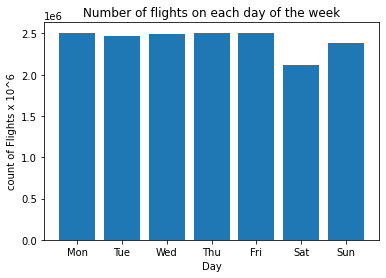

In [13]:
plt.title("Number of flights on each day of the week")
plt.bar(['Mon','Tue','Wed','Thu','Fri',"Sat", 'Sun'],day_count['Count'])
plt.ylabel("count of Flights x 10^6")
plt.xlabel("Day")
plt.show()

### Q: Find the ratio of flights cancelled on each day of the week?

Plot a bar plot showing the results.

In [14]:
# Your code here
out = make_query("Select DayOfWeek, sum(Cancelled), count(cancelled) from logs group by DayOfWeek")
cancelled_flight_df = make_frame(out, ['DayOfWeek','Cancelled','Total_Flights'])
cancelled_flight_df['Cancelled_ratio'] = cancelled_flight_df['Cancelled']/cancelled_flight_df['Total_Flights']

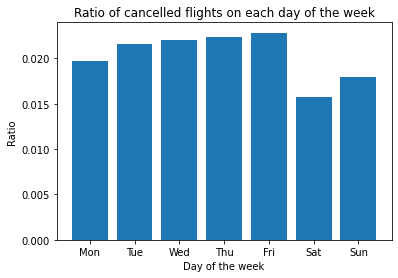

In [15]:
plt.bar(['Mon','Tue','Wed','Thu','Fri',"Sat", 'Sun'],cancelled_flight_df['Cancelled_ratio'])
plt.title('Ratio of cancelled flights on each day of the week')
plt.xlabel("Day of the week")
plt.ylabel("Ratio")
plt.show()

### Q: Which Airport has seen the lowest average departure delay over all the years?

In [16]:
# Your code here
out = make_query("Select airport from Airports where iata  = (Select origin from logs GROUP BY Origin ORDER BY AVG(DepDelay) ASC limit 1);")
out[0][0]

'Mid Delta Regional'

### Q: Do older planes suffer more delays?

In [18]:
out = make_query("SELECT ( travel_year-manf_year) as age, delay FROM (SELECT plane_data.year as manf_year, logs.year as travel_year,plane_data.tailnum as tailnum, logs.ArrDelay as delay FROM logs LEFT JOIN plane_data ON logs.TailNum = plane_data.tailnum)")

In [27]:
# Your code here
age_df = make_frame(out,['age', 'delay'])


16984354

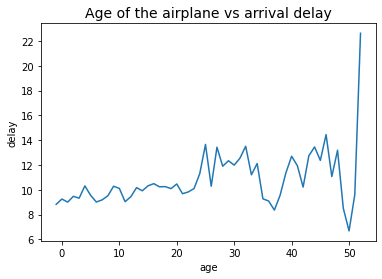

In [24]:
sns.lineplot(data = age_df.groupby('age').mean().iloc[:-3], x = 'age', y = 'delay')
plt.title("Age  vs arrival delay", fontsize = 14)
plt.show()

### Q: How well does weather predict plane delays?

In [29]:
# Your code here
out = make_query("SELECT WeatherDelay,ArrDelay FROM logs where WeatherDelay>0")
df_weather = make_frame(out, columns =  ["weather_delay", "delay"])
df_weather.head()

,weather_delay,delay
0,24.0,129.0
1,12.0,69.0
2,22.0,23.0
3,7.0,16.0
4,25.0,25.0


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


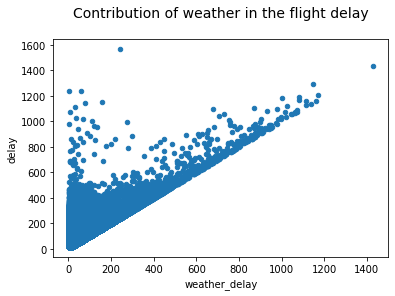

In [30]:
df_weather.plot(kind  = "scatter", x= 'weather_delay', y= 'delay')
plt.title("Contribution of weather in the flight delay\n", fontsize = 14)
plt.show()